Mielage Prediction

Objective : to predict the mielage of the vehicle based on the various specifications

Data source : Ybi foundation Github

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

Describe Data

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [8]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

Data Preprocessing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [13]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Data Visualization

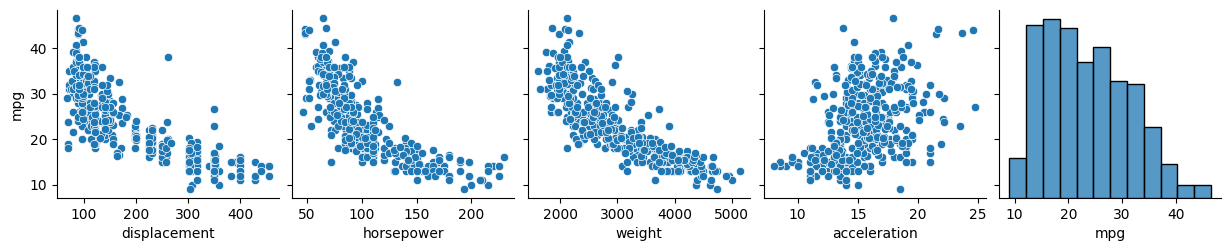

In [14]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

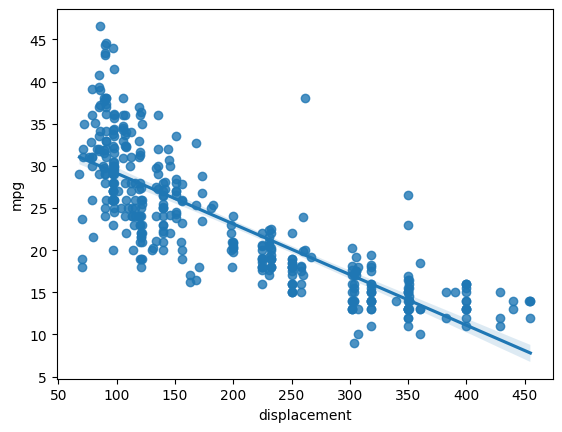

In [15]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

Define Target Variable y and Feature variable x

In [16]:
y = df['mpg']
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [17]:
y.shape

(392,)

In [19]:
x.shape

(392, 4)

Train Test Split Data

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

Modeling

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [22]:
lr.intercept_

45.448419039366485

In [23]:
lr.coef_

array([-0.01560927, -0.03347897, -0.00472077, -0.09118305])

Prediction

In [25]:
y_pred = lr.predict(xtest)
y_pred

array([22.09194985, 16.96193369, 26.68261521, 14.04979004, 24.15245887,
       26.79631126, 27.21011112, 26.0432071 , 14.9411836 , 24.82140106,
       18.80801569, 28.14885966, 26.72864643, 24.06906858, 12.31206909,
       22.18300663, 14.93969512, 21.23954128, 26.8424492 , 21.54425724,
       21.59864154, 22.59251075, 29.01460178, 30.45986294, 24.39001062,
       24.04308556, 30.92245764, 22.65593818, 14.74783075, 32.06162948,
       25.80929901, 24.5745818 ,  9.31385108, 17.2980933 , 14.16985551,
       30.85303149, 11.31395556, 29.32588488,  9.31662914, 19.1790529 ,
       31.82947955, 21.08223471, 17.15254695, 10.01432848, 10.42813986,
       17.80110929, 19.88875909, 29.67908657, 31.86242674, 25.31089151,
       25.75143885, 31.31814747, 26.90918542, 17.01791898, 26.44553259,
       30.32230142, 30.61144306, 16.80852921, 28.14530034, 21.25718893,
       30.31978616, 14.17171217, 21.51695418, 28.61966225, 30.90325762,
       30.30128513, 22.72985288, 14.13878082, 19.25249741, 32.18

Model Evaluation

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
mean_absolute_error(ytest, y_pred)

2.8991625342082488

In [27]:
mean_absolute_percentage_error(ytest, y_pred)

0.12643701968965607

In [28]:
r2_score(ytest, y_pred)

0.7350911612383244

Explanation : Based on the various factors the machine is being bulit to predict the mielage of an vehicle.